## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 2: Prediction using Unsupervised Learning ML

In this task it is required to predict from the given ‘Iris’ dataset, the optimum number of clusters and represent it visually.
### Steps:

* 1 - Importing the dataset
* 2 - Visualizing the dataset
* 3 - Preparing Data
* 4 - Finding Optimum number of Clusters
* 5 - Applying KMeans on data
* 6 - Visualizing the Clusters formed

### 1 - Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings as wg
wg.filterwarnings("ignore")

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 2 - Visualizing the dataset

<Axes: >

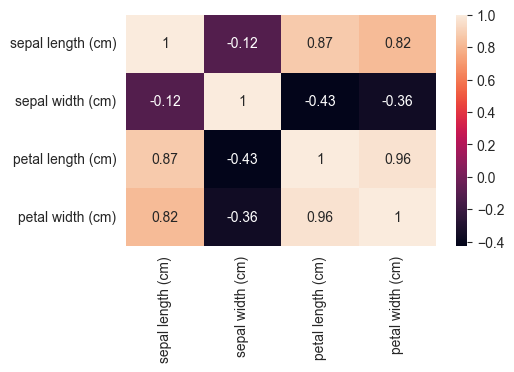

In [30]:
sns.heatmap(data.corr(),annot=True)

### 3 - Preparing Data

Data cleaning by removing duplicate data and unused columns like Column id & Species for unsupervised learning problem.

In [32]:
print(data.isnull().sum(), '\n\nNumber of duplicate rows: ' , data.duplicated().sum())
data.drop_duplicates(inplace=True)  
data.shape[0]

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64 

Number of duplicate rows:  0


149

In [33]:
# iris_d = iris.drop(columns= ['Species' ,'Id'] )
# iris_d.head()
iris_df = data.iloc[:, [0, 1, 2, 3]].values

### 4 - Finding Optimum number of Clusters

Before clustering the data using KMeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

In Elbow method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value & inertia_ is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [5]:
# within-cluster sum of squares
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)

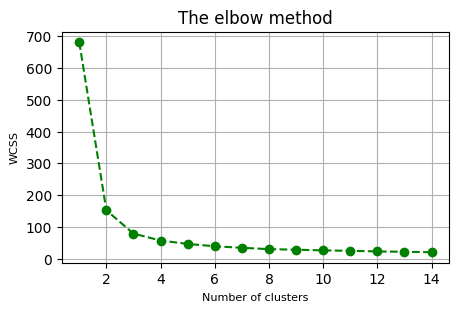

In [6]:
# mpl.plot(range(1, 15), wcss)
mpl.rcParams["figure.figsize"] = [5,3]
mpl.plot(range(1, 15), wcss, 'go--', color='green')
mpl.title('The elbow method')
mpl.xlabel('Number of clusters', size='8')
mpl.ylabel('WCSS', size='8') # Within cluster sum of squares
mpl.grid()
mpl.show()

### 5 - Applying KMeans on data

Since, the elbow is formed at 3, the number of clusters will be 3.

In [8]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = model.fit_predict(iris_df)

### 6 - Visualizing the Clusters formed

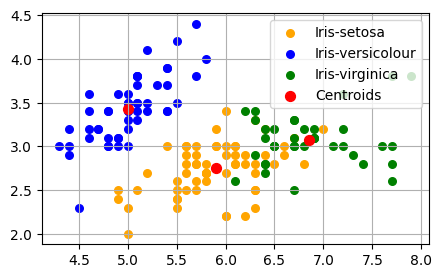

In [9]:
mpl.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1], s=30, c='orange', label='Iris-setosa')
mpl.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], s=30, c='blue', label='Iris-versicolour')
mpl.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1], s=30, c='green', label='Iris-virginica')

mpl.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
#Plotting the centroids of the clusters
mpl.grid()
mpl.legend()
mpl.show()

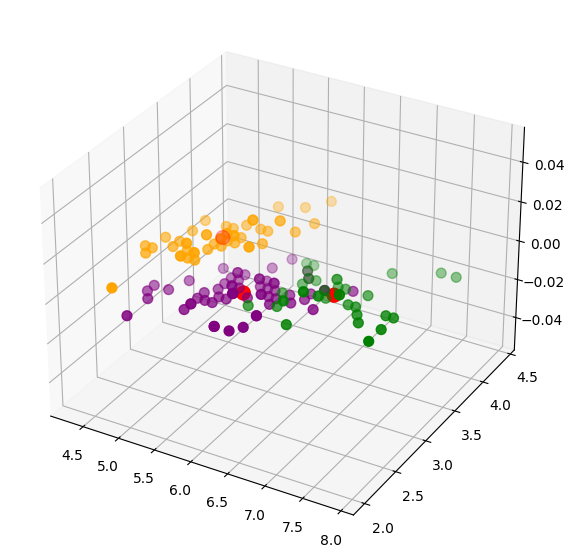

In [10]:
fig = mpl.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
mpl.scatter(iris_df[y_kmeans == 0, 0], iris_df[y_kmeans == 0, 1], s=50, c='purple', label='Iris-setosa')
mpl.scatter(iris_df[y_kmeans == 1, 0], iris_df[y_kmeans == 1, 1], s=50, c='orange', label='Iris-versicolour')
mpl.scatter(iris_df[y_kmeans == 2, 0], iris_df[y_kmeans == 2, 1], s=50, c='green', label='Iris-virginica')

#Plotting the centroids of the clusters
mpl.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
mpl.show()

In [14]:
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


<Axes: ylabel='count'>

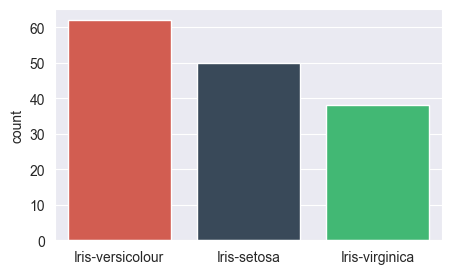

In [20]:
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(), 
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]))

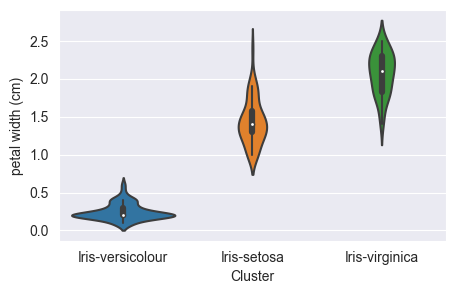

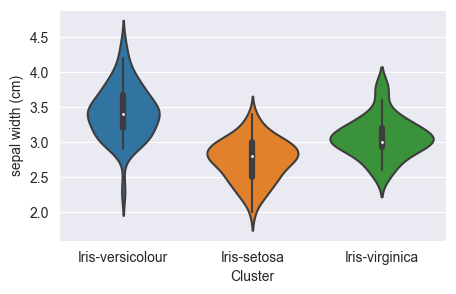

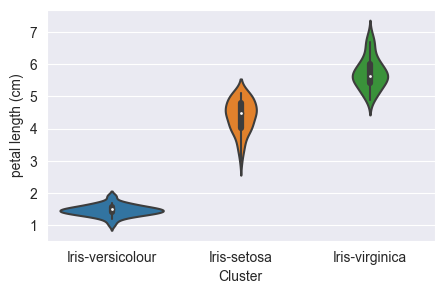

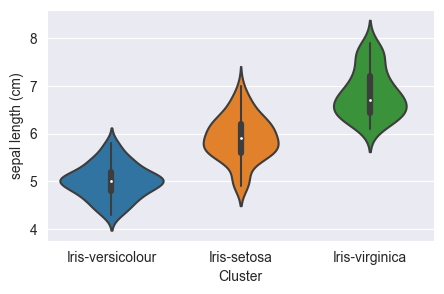

In [16]:
sns.violinplot(x="Cluster",y="petal width (cm)",data=data_with_clusters)
mpl.show()
sns.violinplot(x="Cluster",y="sepal width (cm)",data=data_with_clusters)
mpl.show()
sns.violinplot(x="Cluster",y="petal length (cm)",data=data_with_clusters)
mpl.show()
sns.violinplot(x="Cluster",y="sepal length (cm)",data=data_with_clusters)
mpl.show()

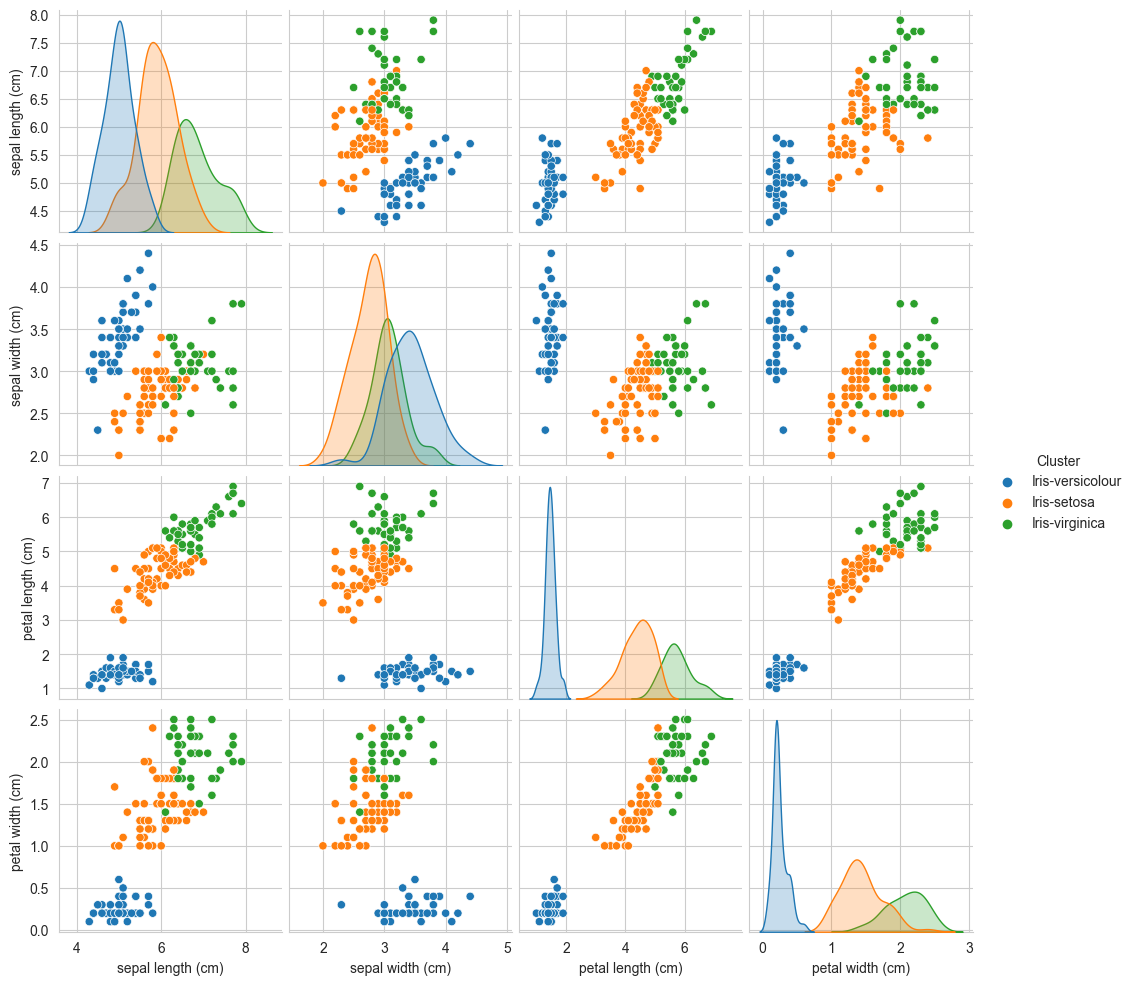

In [17]:

sns.set_style('whitegrid')   ### Sets grid style
sns.pairplot(data_with_clusters,hue = 'Cluster')

1. Petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship).
2. Iris-Setosa seems to have smaller petal length and petal width as compared to others. 
3.   Looking at the overall scenario, it seems to be the case that Iris-Setosa has smaller dimensions than other flowers.

### Conclusion:
From the above data interpretation using KMeans Clustering, we may conclude that optimum number of clusters should be 'three(3)'  

## Thank you!